# UTS DL NO 3
**Raymoond 2301872381**

# Import dataset & Library
disini saya melakukan import dari dataset dan library yang akan digukanakan nanti dalam code


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from keras.models import Sequential
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, experimental , MaxPool2D

In [2]:
dataset=cifar10.load_data()
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_train = x_train[np.isin(y_train,[1,3,5,9]).flatten()]
y_train = y_train[np.isin(y_train,[1,3,5,9]).flatten()]
x_test = x_test[np.isin(y_test,[1,3,5,9]).flatten()]
y_test = y_test[np.isin(y_test,[1,3,5,9]).flatten()]

# Preprocess data
Sebelum data dapat digunakan maka data saya preprocess terlebih dahulu dengan ordinal encoder dan mengubah x tran menjadi float serta membagi nya ke 255 

In [4]:
ordinal = OrdinalEncoder().fit(y_train)
y_train = ordinal.transform(y_train)
y_test = ordinal.transform(y_test)

In [5]:
x_train =x_train.astype('float32')
x_test =x_test.astype('float32')

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

# Modelling & print model
disini saya melakukan modeling sesuai dengan yang soal inginkan yaitu 
input (32x32x3) and the suggested architecture of your CNN is
as follows: Conv(16,3x3), Relu, Conv(32,3x3), Relu, Conv(64,3x3), 2FC, and Softmax(4).

dan mendapatkan hasil accuracy sebagai berikut


In [7]:
cifar10_model=Sequential()
cifar10_model.add(Conv2D(filters=16,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
cifar10_model.add(Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(Flatten())
cifar10_model.add(Dropout(0.5,noise_shape=None,seed=None))
cifar10_model.add(Dense(units=128,activation='relu'))
cifar10_model.add(Dense(units=128,activation='relu'))
cifar10_model.add(Dense(units=4,activation='softmax'))

In [8]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["Accuracy"])

In [9]:
cifar10_model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test))

Epoch 1/15
625/625 [==============================] - 21s 14ms/step - loss: 0.7937 - Accuracy: 0.6317 - val_loss: 0.6305 - val_Accuracy: 0.7147
Epoch 2/15
625/625 [==============================] - 8s 12ms/step - loss: 0.5944 - Accuracy: 0.7366 - val_loss: 0.5650 - val_Accuracy: 0.7510
Epoch 3/15
625/625 [==============================] - 8s 12ms/step - loss: 0.5088 - Accuracy: 0.7784 - val_loss: 0.5299 - val_Accuracy: 0.7598
Epoch 4/15
625/625 [==============================] - 7s 12ms/step - loss: 0.4360 - Accuracy: 0.8124 - val_loss: 0.5163 - val_Accuracy: 0.7797
Epoch 5/15
625/625 [==============================] - 8s 12ms/step - loss: 0.3704 - Accuracy: 0.8415 - val_loss: 0.5100 - val_Accuracy: 0.7918
Epoch 6/15
625/625 [==============================] - 8s 12ms/step - loss: 0.3194 - Accuracy: 0.8678 - val_loss: 0.5491 - val_Accuracy: 0.7850
Epoch 7/15
625/625 [==============================] - 7s 12ms/step - loss: 0.2641 - Accuracy: 0.8900 - val_loss: 0.5977 - val_Accuracy: 0.782

# Classificatin report & Conffusion matrix
Pada akhirnyas saya menpredict data tadi dan mengubah value yang dibawah 0.5 mejadi 1, stelah itu saya memperlihatkan coffusion matrix dan mengeprint classification reprot serta accuracy dari predictnya

In [10]:
Predict = cifar10_model.predict(x_test)
Predict = (Predict > 0.5).astype(int)

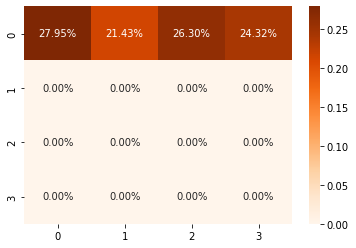

In [11]:
# Confusion Matrix
Conf = confusion_matrix(
    y_test.argmax(axis=1), Predict.argmax(axis=1))
sns.heatmap(Conf/np.sum(Conf), annot=True, 
            fmt='.2%', cmap='Oranges')

In [12]:
print(classification_report(y_test.argmax(axis=1), Predict.argmax(axis=1), labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.28      0.44      4000
           1       0.00      0.00      0.00         0

   micro avg       0.57      0.28      0.37      4000
   macro avg       0.50      0.14      0.22      4000
weighted avg       1.00      0.28      0.44      4000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
accuracy_score(y_test.argmax(axis=1), Predict.argmax(axis=1))

0.2795

Dan akhirnya saya melakukan prediction dan memperlihatkan predictionya dengan confusion matrix saya juga memperlihatka  recall dan f1 score dari data diatas